# Sample Simulation
created by: Philipp Wieser, TU Graz

date: 18.8.2023

loosely based on the example script in https://bornagainproject.org/21/ex/sim/gisas/

## Importing the necessary Libraries

In [1]:
"""
Basic example of a DWBA simulation of a GISAS experiment.
"""
import bornagain as ba
from bornagain import ba_plot as bp, deg, nm
from matplotlib import rcParams
import matplotlib.pyplot as plt


## Sample descriptor

In [2]:
def get_sample():
    """
    Standard sample model: dilute random assembly of cylinders on a substrate.
    """
    from bornagain import std_samples
    return std_samples.cylinders()


## Simulation

In [3]:
def get_simulation(sample):
    # Beam
    wavelength = 0.1*nm
    alpha_i = 0.2*deg
    beam = ba.Beam(1e9, wavelength, alpha_i)

    # Detector
    nPix = 200
    detector = ba.SphericalDetector(nPix, -2*deg, 2*deg, nPix, 0, 3*deg)

    return ba.ScatteringSimulation(beam, sample, detector)


## Execution of the Simulation

In [4]:
sample = get_sample()
simulation = get_simulation(sample)
result = simulation.simulate()

## Plotting overview

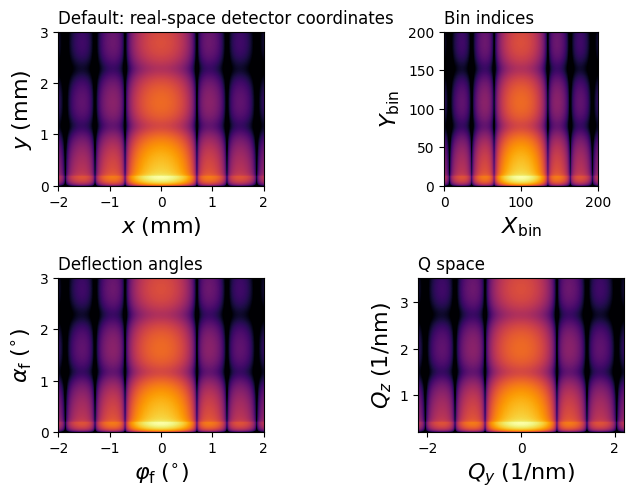

In [5]:
def plot_Overview(result):
    """
    Plots 2D simulation results for different scales, 
    i.e., q space, bin, mm and angle 
    """
    # set plotting parameters
    rcParams['image.aspect'] = 'auto'

    plt.figure(figsize=(8, 5))

    plt.subplot(2, 2, 1)
    # default units for rectangular detector are millimeters

    bp.plot_simres(result,
                   xlabel=r'$x \;({\rm mm})$',
                   ylabel=r'$y \;({\rm mm})$',
                   zlabel=None,
                   with_cb=False)
    plt.title("Default: real-space detector coordinates", loc='left')

    plt.subplot(2, 2, 2)
    bp.plot_simres(result,
                   units=ba.Coords_NBINS,
                   xlabel=r'$X_{\rm bin}$',
                   ylabel=r'$Y_{\rm bin}$',
                   zlabel=None,
                   with_cb=False)
    plt.title("Bin indices", loc='left')

    plt.subplot(2, 2, 3)
    bp.plot_simres(result,
                   units=ba.Coords_DEGREES,
                   xlabel=r'$\varphi_{\rm f} \;(^{\circ})$',
                   ylabel=r'$\alpha_{\rm f} \;(^{\circ})$',
                   zlabel=None,
                   with_cb=False)
    plt.title("Deflection angles", loc='left')

    plt.subplot(2, 2, 4)
    bp.plot_simres(result,
                   units=ba.Coords_QSPACE,
                   xlabel=r'$Q_{y} \;(1/{\rm nm})$',
                   ylabel=r'$Q_{z} \;(1/{\rm nm})$',
                   zlabel=None,
                   with_cb=False)
    plt.title("Q space", loc='left')

    plt.subplots_adjust(
        left=0.07,
        right=0.97,
        top=0.9,
        bottom=0.1,
        hspace=0.6,
        wspace=0.,
    )
    
plot_Overview(result)

## Plotting in Q-space

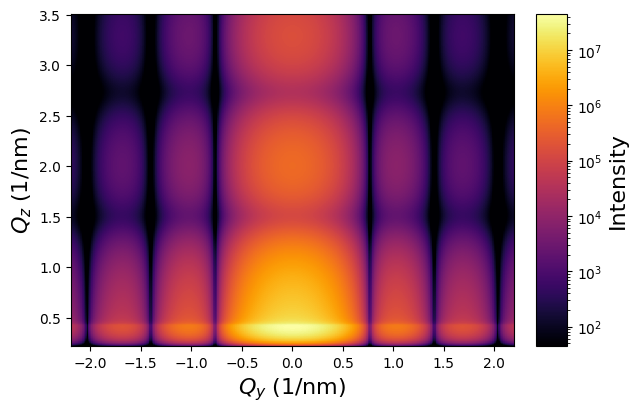

In [6]:
def plot_Q(result):
    """
    Plots 2D simulation results in q scale.
    """
    # set plotting parameters
    rcParams['image.aspect'] = 'auto'
    
    #create plot
    plt.figure()
    
    bp.plot_simres(result,
                   units=ba.Coords_QSPACE,
                   xlabel=r'$Q_{y} \;(1/{\rm nm})$',
                   ylabel=r'$Q_{z} \;(1/{\rm nm})$',
                   zlabel="Intensity",
                   with_cb=True)
    
plot_Q(result)